<a href="https://colab.research.google.com/github/Prime2911/customer-churn-prediction/blob/main/CCCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT MACHINE LEARNING TUẦN 4 - 5**
---

**Thực hiện và trình bày:** Nhóm 1

**Danh sách thành viên:**

1.   Cao Nguyễn Hải Duy
2.   Huỳnh Đình Minh Trí
3.   Huỳnh Thái Thảo Trang
4.   Hồ Thị Huyền Mơ



# **TOPIC:** DỰ ĐOÁN KHẢ NĂNG MẤT MÁT KHÁCH HÀNG (CUSTOMER CHURN PREDICTION)
---

**Giới thiệu bài toán:** Khi khách hàng đăng ký sử dụng dịch vụ của một công ty viễn thông, họ thường lựa chọn nhà cung cấp dựa trên nhiều tiêu chí, trong đó bao gồm cước phí phát sinh cho mỗi cuộc gọi, chất lượng dịch vụ, etc.

![](https://cdna.artstation.com/p/assets/images/images/011/981/126/4k/marton-adam-marton-tomesjerry.jpg?1532427188)

Nếu như khách hàng không hài lòng với dịch vụ của nhà cung cấp viễn thông hiện tại, hoặc cảm thấy cước phí của mỗi cuộc gọi là quá cao, họ có thể sẽ chuyển sang sử dụng dịch vụ của nhà cung cấp viễn thông khác, từ đấy dẫn đến việc nhà cung cấp viễn thông hiện tại bị **mất mát khách hàng** (**Customer Churn**). Điều này có thể dẫn tới việc mất mát cả những khách hàng tiềm năng và làm ảnh hưởng tới lợi nhuận của công ty.

Việc dự đoán khả năng mất mát khách hàng sẽ giúp các công ty viễn thông nhanh chóng đưa ra giải pháp hiệu quả để giữ khách hàng và tăng khả năng cạnh tranh với các công ty viễn thông khác.

**Yêu cầu:** Dựa vào các thuộc tính để dự đoán xem khách hàng có ngưng sử dụng dịch vụ của công ty viễn thông hay không (**0**: khách hàng vẫn tiếp tục sử dụng - **1**: khách hàng ngưng sử dụng).

**Dataset bao gồm:**

*   Tập train: 4250 bản ghi (mẫu) khách hàng (bao gồm thuộc tính churn cho biết khách hàng có chuyển sang dùng dịch vụ của nhà cung cấp khác không).
*   Tập test: 750 mẫu.

**Mỗi khách hàng có những thuộc tính sau:**

1.   state: mã bang của khách hàng.
2.   account_length: lượng thời gian mà khách hàng đã sử dụng dịch vụ của nhà cung cấp (tính bằng số tháng).
3.   area_code: mã vùng.
4.   international_plan: khách hàng có đăng ký dịch vụ gọi quốc tế hay không (**yes**: có - **no**: không).
5.   voice_mail_plan: khách hàng có đăng ký dịch vụ hộp thư thoại hay không (**yes**: có - **no**: không).
6.   number_vmail_messages: số lượng tin nhắn thoại khách hàng đã nhận được.
7.   total_day_minutes: tổng thời gian của các cuộc gọi phát sinh vào ban ngày (tính bằng số phút).
8.   total_day_calls: số cuộc gọi phát sinh vào ban ngày.
9.   total_day_charge: tổng cước phí của các cuộc gọi phát sinh vào ban ngày.
10.   total_eve_minutes: tổng thời gian của các cuộc gọi phát sinh vào buổi tối (tính bằng số phút).
11.   total_eve_calls: số cuộc gọi phát sinh vào buổi tối.
12.   total_eve_charge: tổng cước phí của các cuộc gọi phát sinh vào buổi tối.
13.   total_night_minutes: tổng thời gian của các cuộc gọi phát sinh vào ban đêm (tính bằng số phút).
14.   total_night_calls: số cuộc gọi phát sinh vào ban đêm.
15.   total_night_charge: tổng cước phí của các cuộc gọi phát sinh vào ban đêm.
16.   total_intl_minutes: tổng thời gian của các cuộc gọi quốc tế (tính bằng số phút).
17.   total_intl_calls: số cuộc gọi quốc tế.
18.   total_intl_charge: tổng cước phí của các cuộc gọi quốc tế.
19.   number_customer_service_calls: số cuộc gọi đến dịch vụ chăm sóc khách hàng.
20.   churn: khách hàng có ngưng sử dụng dịch vụ của công ty hay không (**yes**: có - **no**: không).

In [ ]:
#Import các package cơ bản
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#Import module preprocessing để hỗ trợ việc encode thuộc tính và đầu ra dự đoán
import sklearn.preprocessing as pp

## I. Tải tập dữ liệu train - test
---

*   Tập train: 4250 mẫu (bao gồm 20 thuộc tính nêu trên), chiếm 85% tổng số khách hàng.
*   Tập test: 750 mẫu (bao gồm 20 thuộc tính, không có thuộc tính churn và có thêm thuộc tính id - số thứ tự khách hàng), chiếm 15% tổng số khách hàng.

In [ ]:
#Liên kết Colab với Drive

from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#Tải các tập dữ liệu train và test từ Drive

df_train = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Customer Churn Prediction/train.csv")

df_test = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Customer Churn Prediction/test.csv")

### **Quan sát và truy xuất dữ liệu trong dataset**
---

In [ ]:
#Hiển thị dữ liệu của tập train
#Mặc định: 5 dòng đầu & 5 dòng cuối

df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [ ]:
#Hiển thị thông tin khách hàng thứ 1000, 2000, và 3000

df_train.loc[[999, 1999, 2999]]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
999,MD,88,area_code_415,yes,no,0,235.1,98,39.97,251.8,79,21.40,285.9,76,12.87,7.2,2,1.94,4,yes
1999,VA,118,area_code_408,no,no,0,154.8,71,26.32,244.0,73,20.74,159.6,81,7.18,12.8,4,3.46,0,no
2999,NM,124,area_code_408,no,no,0,244.6,91,41.58,125.1,70,10.63,303.4,104,13.65,12.0,5,3.24,0,no


In [ ]:
#Liệt kê danh sách thuộc tính của df_train

df_train.columns.values

array(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'], dtype=object)

In [ ]:
#Lấy mã bang và mã vùng của các khách hàng từ vị trí 322 - 350

df_train.loc[321:349, ["state", "area_code"]]

,state,area_code
321,NH,area_code_510
322,WI,area_code_415
323,WV,area_code_415
324,MA,area_code_415
325,MD,area_code_415
326,PA,area_code_510
327,WI,area_code_510
328,TN,area_code_415
329,IL,area_code_510
330,DC,area_code_415


## II. Phân tích số liệu tập train
---

### 1) Thống kê tổng quan
---

In [ ]:
#Hiển thị thông tin tổng quan của tập train: số row, số column, tên thuộc tính, số lượng giá trị không null và kiểu dữ liệu của từng thuộc tính

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
#Hiển thị kích thước tập train

print("Training dataset's shape: ", df_train.shape)

Training dataset's shape:  (4250, 20)


In [ ]:
#Đếm số dòng dữ liệu không chứa giá trị null theo từng cột (tập train):

df_train.count()

state                            4250
account_length                   4250
area_code                        4250
international_plan               4250
voice_mail_plan                  4250
number_vmail_messages            4250
total_day_minutes                4250
total_day_calls                  4250
total_day_charge                 4250
total_eve_minutes                4250
total_eve_calls                  4250
total_eve_charge                 4250
total_night_minutes              4250
total_night_calls                4250
total_night_charge               4250
total_intl_minutes               4250
total_intl_calls                 4250
total_intl_charge                4250
number_customer_service_calls    4250
churn                            4250
dtype: int64

Ta có thể thấy rằng, không có thuộc tính nào bị mất mát dữ liệu. Do đó, ta không cần phải xử lý giá trị mất mát trong quá trình tiền xử lý dữ liệu.

In [ ]:
#Thống kê tổng quan của các thuộc tính có kiểu dữ liệu dạng số

df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#Thống kê tổng quan của các thuộc tính có kiểu dữ liệu dạng object

df_train.describe(include = "O")

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [ ]:
#Liệt kê số lượng missing data của mỗi thuộc tính

print("Training dataset's missing value count: \n")
df_train.isnull().sum()

Training dataset's missing value count: 



state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

### 2) Phân tích mối tương quan giữa các thuộc tính chủ chốt ảnh hưởng tới kết quả đầu ra
---
Phân tích nhanh mối tương quan giữa các thuộc tính chủ chốt, áp dụng được cho các thuộc tính có các kiểu dữ liệu sau:

*   Phân loại (Categorical): international_plan, voice_mail_plan
*   Rời rạc (Discrete): account_length, number_vmail_messages, total_day_calls, total_eve_calls, total_night_calls, total_intl_calls, number_customer_service_calls



In [ ]:
#Chuẩn hóa thuộc tính đầu ra churn bằng cách đưa nó về dạng số để phân tích mối tương quan và trực quan hóa dataset

le = pp.LabelEncoder()
df_train_temp = df_train.copy()
df_train_temp["churn"] = le.fit_transform(df_train_temp["churn"])

In [ ]:
#Thuộc tính account_length

df_train_temp[["account_length", "churn"]].groupby(["account_length"], as_index = False).mean().sort_values(by = "churn", ascending = False)

,account_length,churn
202,208,1.0
205,212,1.0
187,188,0.5
212,225,0.5
211,224,0.5
...,...,...
164,165,0.0
179,180,0.0
182,183,0.0
183,184,0.0


In [ ]:
#Thuộc tính international_plan

df_train_temp[["international_plan", "churn"]].groupby(["international_plan"], as_index = False).mean().sort_values(by = "churn", ascending = False)

,international_plan,churn
1,yes,0.421717
0,no,0.111832


In [ ]:
#Thuộc tính voice_mail_plan

df_train_temp[["voice_mail_plan", "churn"]].groupby(["voice_mail_plan"], as_index = False).mean().sort_values(by = "churn", ascending = False)

,voice_mail_plan,churn
0,no,0.164436
1,yes,0.073741


In [ ]:
#Thuộc tính number_vmail_messages

df_train_temp[["number_vmail_messages", "churn"]].groupby(["number_vmail_messages"], as_index = False).mean().sort_values(by = "churn", ascending = False)

,number_vmail_messages,churn
42,48,0.500000
38,44,0.285714
36,42,0.235294
35,41,0.166667
0,0,0.164384
23,29,0.140351
30,36,0.129032
27,33,0.127273
12,18,0.125000
22,28,0.120690


In [ ]:
#Thuộc tính total_day_calls

df_train_temp[["total_day_calls", "churn"]].groupby(["total_day_calls"], as_index = False).mean().sort_values(by = "churn", ascending = False)

,total_day_calls,churn
119,165,1.0
6,42,1.0
115,156,1.0
118,160,0.5
7,44,0.5
...,...,...
17,54,0.0
101,138,0.0
4,36,0.0
1,30,0.0


In [ ]:
#Thuộc tính total_eve_calls

df_train_temp[["total_eve_calls", "churn"]].groupby(["total_eve_calls"], as_index = False).mean().sort_values(by = "churn", ascending = False)

,total_eve_calls,churn
120,168,1.000000
119,159,1.000000
112,151,0.666667
9,48,0.333333
28,67,0.333333
...,...,...
13,52,0.000000
18,57,0.000000
19,58,0.000000
20,59,0.000000


In [ ]:
#Thuộc tính total_night_calls

df_train_temp[["total_night_calls", "churn"]].groupby(["total_night_calls"], as_index = False).mean().sort_values(by = "churn", ascending = False)

,total_night_calls,churn
114,152,0.500000
6,42,0.500000
120,158,0.500000
18,56,0.400000
113,151,0.333333
...,...,...
17,55,0.000000
1,33,0.000000
104,142,0.000000
106,144,0.000000


In [ ]:
#Thuộc tính total_intl_calls

df_train_temp[["total_intl_calls", "churn"]].groupby(["total_intl_calls"], as_index = False).mean().sort_values(by = "churn", ascending = False)

,total_intl_calls,churn
20,20,1.000000
15,15,0.333333
18,18,0.250000
1,1,0.216814
11,11,0.210526
14,14,0.200000
2,2,0.192547
10,10,0.152542
7,7,0.136029
4,4,0.130818


In [ ]:
#Thuộc tính number_customer_service_calls

df_train_temp[["number_customer_service_calls", "churn"]].groupby(["number_customer_service_calls"], as_index = False).mean().sort_values(by = "churn", ascending = False)

,number_customer_service_calls,churn
9,9,1.000000
6,6,0.678571
5,5,0.604938
7,7,0.538462
8,8,0.500000
4,4,0.440191
3,3,0.112903
0,0,0.109481
1,1,0.108924
2,2,0.107709


## III. Trực quan hóa tập dữ liệu
---
Phân tích tập dữ liệu train sử dụng phương pháp trực quan hóa dữ liệu, ta thu được những kết quả sau:

<Figure size 432x288 with 0 Axes>

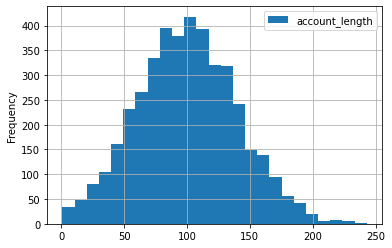

In [ ]:
#Biểu đồ tần suất theo số tháng sử dụng của dataset

plt.figure()
df_train[["account_length"]].plot.hist(bins = 25)
plt.grid()

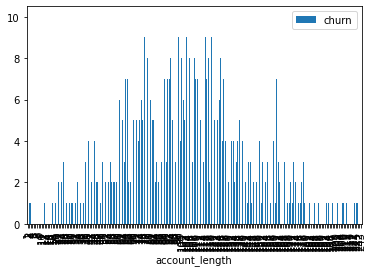

In [ ]:
acc_len = df_train_temp[["account_length","churn"]].dropna().astype(int)
acc_len = acc_len.groupby(["account_length"]).sum().sort_values(by = "account_length", ascending = True)
acc_len.plot.bar()

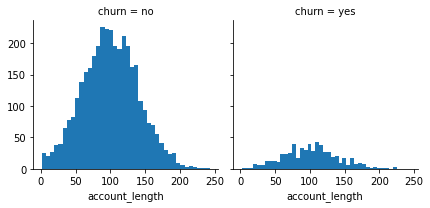

In [ ]:
acc_length_grid = sns.FacetGrid(df_train, col = "churn")
acc_length_grid.map(plt.hist, "account_length", bins = 40)

**MỐI TƯƠNG QUAN GIỮA CÁC THUỘC TÍNH SỐ (account_length)**
 
Quan sát dữ liệu:
 
*   Phần lớn khách hàng đã sử dụng dịch vụ của nhà cung cấp trong khoảng thời gian từ 70 - 150 tháng.
*   Những khách hàng nói trên đều chiếm phần lớn trong số những khách hàng đã chuyển sang nhà cung cấp viễn thông khác và số khách hàng vẫn đang sử dụng dịch vụ của nhà cung cấp hiện tại.
 
Xem xét:
 
*   Đưa thuộc tính account_length vào mô hình huấn luyện.
*   Cân nhắc chia thời gian sử dụng dịch vụ ra thành từng khoảng.

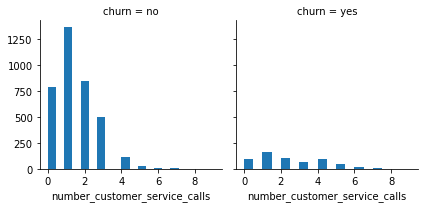

In [ ]:
cust_serv_grid = sns.FacetGrid(df_train, col = "churn")
cust_serv_grid.map(plt.hist, "number_customer_service_calls", bins = 18)

**MỐI TƯƠNG QUAN GIỮA CÁC THUỘC TÍNH SỐ (number_customer_service_calls)**

Quan sát dữ liệu:

*   Phần lớn khách hàng đã gọi dịch vụ chăm sóc khách hàng từ 0 - 4 lần.
*   Trong số những khách hàng nói trên thì phần lớn đều không chuyển qua sử dụng dịch vụ nhà cung cấp khác.
*   Đối với những khách hàng đã gọi cho dịch vụ chăm sóc khách hàng trên 4 lần, khoảng 50% đã chuyển qua sử dụng dịch vụ nhà cung cấp khác.

Xem xét:

*   Đưa thuộc tính number_customer_service_calls vào mô hình huấn luyện.



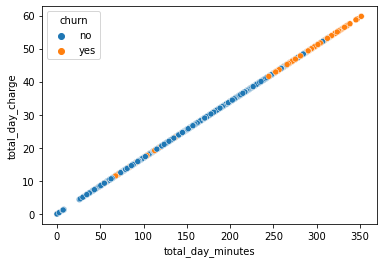

In [ ]:
sns.scatterplot(hue = "churn", x = "total_day_minutes", y = "total_day_charge", data = df_train)

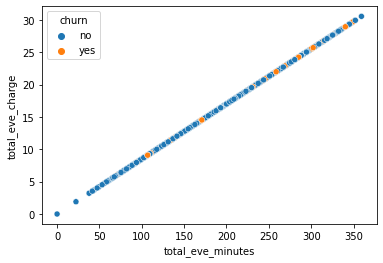

In [ ]:
sns.scatterplot(hue = "churn", x = "total_eve_minutes", y = "total_eve_charge", data = df_train)

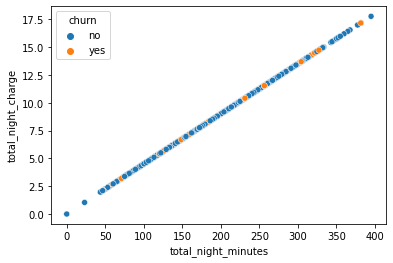

In [ ]:
sns.scatterplot(hue = "churn", x = "total_night_minutes", y = "total_night_charge", data = df_train)

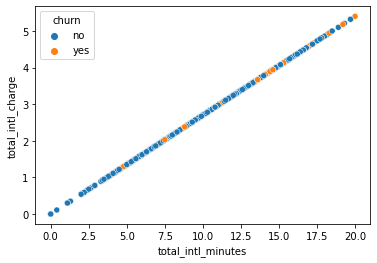

In [ ]:
sns.scatterplot(hue = "churn", x = "total_intl_minutes", y = "total_intl_charge", data = df_train)

**MỐI TƯƠNG QUAN GIỮA CÁC THUỘC TÍNH SỐ (total_XXX_minutes, total_XXX_charge)**

Quan sát dữ liệu:

*   Phần lớn khách hàng bỏ đi nằm sau trung vị (median - 50th percentile).
*   Thuộc tính total_XXX_charge (cước phí) có thể được biểu diễn bằng một hàm tuyến tính có dạng total_XXX_charge = m * total_XXX_minute, với m là cước phí mỗi phút gọi.

Xem xét:

*   Chỉ cần sử dụng một trong hai thuộc tính total_XXX_charge hoặc total_XXX_minute trong mô hình huấn luyện. Để bám sát với thực tế hơn, ta sẽ sử dụng thuộc tính total_XXX_charge (cước phí).
*   Cân nhắc chia các thuộc tính cước phí ra thành từng khoảng.

## IV. Tiền xử lý dữ liệu
---
Cả tập train lẫn tập test đều không có giá trị null nên ta sẽ không cần đến bước xử lý dữ liệu mất mát.

### 1) Loại bỏ các thuộc tính không dùng đến
---
Loại bỏ các thuộc tính sau: state, area_code, total_XXX_calls, total_XXX_minutes và number_vmail_messages

In [ ]:
#Loại bỏ thuộc tính tập train

df_train_pp = df_train.drop(["state", "area_code", "total_day_calls",
                             "total_eve_calls", "total_night_calls", "total_intl_calls",
                             "total_day_minutes", "total_eve_minutes", "total_night_minutes",
                             "total_intl_minutes", "number_vmail_messages"], axis = 1)

In [ ]:
#Loại bỏ thuộc tính tập test

df_test_pp = df_test.drop(["id", "state", "area_code",
                           "total_day_calls", "total_eve_calls", "total_night_calls",
                           "total_intl_calls", "total_day_minutes", "total_eve_minutes",
                           "total_night_minutes", "total_intl_minutes", "number_vmail_messages"], axis = 1)

In [ ]:
#Liệt kê danh sách thuộc tính của df_train_pp

df_train_pp.columns.values

array(['account_length', 'international_plan', 'voice_mail_plan',
       'total_day_charge', 'total_eve_charge', 'total_night_charge',
       'total_intl_charge', 'number_customer_service_calls', 'churn'],
      dtype=object)

In [ ]:
#Liệt kê danh sách thuộc tính của df_test_pp

df_test_pp.columns.values

array(['account_length', 'international_plan', 'voice_mail_plan',
       'total_day_charge', 'total_eve_charge', 'total_night_charge',
       'total_intl_charge', 'number_customer_service_calls'], dtype=object)

### 2) Chuyển đổi dữ liệu thuộc tính dạng object thành dạng số
---
Chuyển đổi dữ liệu của 3 thuộc tính churn, international_plan và voice_mail_plan

In [ ]:
#Chuẩn hóa các thuộc tính dạng Classification (yes/no) về dạng số
#0: no - 1: yes

oe = pp.OrdinalEncoder()

df_train_pp[["churn", "international_plan", "voice_mail_plan"]] = oe.fit_transform(df_train_pp[["churn", "international_plan", "voice_mail_plan"]]).astype(int)
df_test_pp[["international_plan", "voice_mail_plan"]] = oe.fit_transform(df_test_pp[["international_plan", "voice_mail_plan"]]).astype(int)

In [ ]:
df_train_pp

,account_length,international_plan,voice_mail_plan,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,107,0,1,27.47,16.62,11.45,3.70,1,0
1,137,0,0,41.38,10.30,7.32,3.29,0,0
2,84,1,0,50.90,5.26,8.86,1.78,2,0
3,75,1,0,28.34,12.61,8.41,2.73,3,0
4,121,0,1,37.09,29.62,9.57,2.03,3,0
...,...,...,...,...,...,...,...,...,...
4245,83,0,0,32.01,20.72,9.62,2.78,0,0
4246,73,0,0,30.24,11.15,8.38,3.11,3,0
4247,75,0,0,29.02,16.41,5.81,1.86,1,0
4248,50,0,1,40.07,18.96,13.39,2.67,2,0


In [ ]:
df_test_pp

,account_length,international_plan,voice_mail_plan,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls
0,128,0,1,45.07,16.78,11.01,2.70,1
1,118,1,0,37.98,18.75,9.18,1.70,0
2,62,0,0,20.52,26.11,9.14,3.54,4
3,93,0,0,32.42,18.55,5.83,2.19,3
4,174,0,0,21.13,23.55,11.28,4.19,3
...,...,...,...,...,...,...,...,...
745,130,0,0,20.30,19.24,9.12,3.05,0
746,73,0,0,30.12,22.99,10.88,3.32,3
747,152,0,0,31.31,21.83,9.61,3.97,3
748,61,0,0,23.90,14.69,9.56,3.67,1


In [ ]:
df_train_pp.shape

(4250, 9)

In [ ]:
df_test_pp.shape

(750, 8)

### 3) Lưu dữ liệu sau khi xử lý vào file .csv
---
Lưu dữ liệu đã được chuẩn hóa vào file:

*   Tập train: train_processed.csv
*   Tập test: test_processed.csv



In [ ]:
#Lưu dataset train và test đã xử lý vào 2 file thuộc folder của project

df_train_pp.to_csv("/content/gdrive/My Drive/Colab Notebooks/Customer Churn Prediction/train_processed.csv", index = False)

df_test_pp.to_csv("/content/gdrive/My Drive/Colab Notebooks/Customer Churn Prediction/test_processed.csv", index = False)

## V. Xây dựng Machine Learning Model bằng sci-kit learn
---

### 1) Chuẩn bị dữ liệu
---
Tập dữ liệu huấn luyện model bao gồm:

*   Tập X_train: bao gồm 8 thuộc tính sau: account_length, international_plan, voice_mail_plan, total_day_charge, total_eve_charge, total_night_charge, total_intl_charge, number_customer_service_calls
*   Tập Y_train: thuộc tính churn

Tập dữ liệu kiểm thử: tập X_test, cũng bao gồm 8 thuộc tính như tập X_train.

In [ ]:
#Tải các dataset train và test đã qua xử lý từ Drive

train_dataset = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Customer Churn Prediction/train_processed.csv")

test_dataset = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Customer Churn Prediction/test_processed.csv")

In [ ]:
X_train = train_dataset.drop("churn", axis = 1)
Y_train = train_dataset["churn"]

X_test = test_dataset

### 2) Sử dụng các model Machine Learning để giải quyết bài toán
---
Những model sẽ được sử dụng: K-Nearest Neighbors, Random Forest, Decision Tree, Support Vector Machines, Logistic Regression, Gaussian Process, Naive Bayes và Multi-layer Perceptron.

#### a) K-Nearest Neighbors
---

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

#Huấn luyện mô hình với tập dữ liệu train
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Thực hiện dự đoán kết quả trên tập dữ liệu test
Y_pred_knn = knn.predict(X_test)
print(Y_pred_knn)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 

In [ ]:
#Đánh giá độ chính xác của mô hình trên tập dữ liệu train
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

print("KNN model's accuracy: ", acc_knn, "%")
print("KNN model's parameters: \n", knn)

KNN model's accuracy:  90.14 %
KNN model's parameters: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


#### b) Random Forest
---

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# rdf = RandomForestClassifier(criterion = "entropy")
rdf = RandomForestClassifier()

#Huấn luyện mô hình với tập dữ liệu train
rdf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Thực hiện dự đoán kết quả trên tập dữ liệu test
Y_pred_rdf = rdf.predict(X_test)
print(Y_pred_rdf)

[0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 

In [ ]:
#Đánh giá độ chính xác của mô hình trên tập dữ liệu train
acc_rdf = round(rdf.score(X_train, Y_train) * 100, 2)

print("Random Forest model's accuracy: ", acc_rdf, "%")
print("Random Forest model's parameters: \n", rdf)

Random Forest model's accuracy:  100.0 %
Random Forest model's parameters: 
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


#### c) Decision Tree
---

In [ ]:
from sklearn.tree import DecisionTreeClassifier

de_tree = DecisionTreeClassifier()

#Huấn luyện mô hình với tập dữ liệu train
de_tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Thực hiện dự đoán kết quả trên tập dữ liệu test
Y_pred_de_tree = de_tree.predict(X_test)
print(Y_pred_de_tree)

[0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 1 

In [ ]:
#Đánh giá độ chính xác của mô hình trên tập dữ liệu train
acc_de_tree = round(de_tree.score(X_train, Y_train) * 100, 2)

print("Decision Tree model's accuracy: ", acc_de_tree, "%")
print("Decision Tree model's parameters: \n", de_tree)

Decision Tree model's accuracy:  100.0 %
Decision Tree model's parameters: 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


#### d) Support Vector Machine
---

In [ ]:
from sklearn.svm import SVC

svc = SVC(gamma = "auto")

#Huấn luyện mô hình với tập dữ liệu train
svc.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Thực hiện dự đoán kết quả trên tập dữ liệu test
Y_pred_svc = svc.predict(X_test)
print(Y_pred_svc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
#Đánh giá độ chính xác của mô hình trên tập dữ liệu train
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

print("Support Vector Machine model's accuracy: ", acc_svc, "%")
print("Support Vector Machine model's parameters: \n", svc)

Support Vector Machine model's accuracy:  96.96 %
Support Vector Machine model's parameters: 
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


#### e) Logistic Regression
---

In [ ]:
from sklearn.linear_model import LogisticRegression

# log_reg = LogisticRegression(max_iter = 1000, solver = "saga", multi_class = "multinomial")
log_reg = LogisticRegression(max_iter = 500, multi_class = "multinomial")


#Huấn luyện mô hình với tập train
log_reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Thực hiện dự đoán kết quả trên tập dữ liệu test
Y_pred_log_reg = log_reg.predict(X_test)
print(Y_pred_log_reg)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 

In [ ]:
#Đánh giá độ chính xác của mô hình trên tập dữ liệu train
acc_log_reg = round(log_reg.score(X_train, Y_train) * 100, 2)

print("Logistic Regression model's accuracy: ", acc_log_reg, "%")
print("Logistic Regression model's parameters: \n", log_reg)

Logistic Regression model's accuracy:  86.78 %
Logistic Regression model's parameters: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


#### f) Gaussian Process
---

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier

gpc = GaussianProcessClassifier()


#Huấn luyện mô hình với tập dữ liệu train
gpc.fit(X_train, Y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=100,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=False)

In [ ]:
#Thực hiện dự đoán kết quả trên tập dữ liệu test
Y_pred_gpc = gpc.predict(X_test)
print(Y_pred_gpc)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 

In [ ]:
#Đánh giá độ chính xác của mô hình trên tập dữ liệu train
acc_gpc = round(gpc.score(X_train, Y_train) * 100, 2)

print("Gaussian Process model's accuracy: ", acc_gpc, "%")
print("Gaussian Process model's parameters: \n", gpc)

Gaussian Process model's accuracy:  100.0 %
Gaussian Process model's parameters: 
 GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=100,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=False)


#### g) Naive Bayes
---

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

#Huấn luyện mô hình với tập dữ liệu train
gnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Thực hiện dự đoán kết quả trên tập dữ liệu test
Y_pred_gnb = gnb.predict(X_test)
print(Y_pred_gnb)

[0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 0 1 1 0 0 0 

In [ ]:
#Đánh giá độ chính xác của mô hình trên tập dữ liệu train
acc_gnb = round(gnb.score(X_train, Y_train) * 100, 2)

print("Naive Bayes model's accuracy: ", acc_gnb, "%")
print("Naive Bayes model's parameters: \n", gnb)

Naive Bayes model's accuracy:  85.51 %
Naive Bayes model's parameters: 
 GaussianNB(priors=None, var_smoothing=1e-09)


#### h) Neural Network: Multi-layer Perceptron
---

In [ ]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(max_iter = 500)

#Huấn luyện mô hình với tập dữ liệu train
mlpc.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#Thực hiện dự đoán kết quả trên tập dữ liệu test
Y_pred_mlpc = mlpc.predict(X_test)
print(Y_pred_mlpc)

[0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 

In [ ]:
#Đánh giá độ chính xác của mô hình trên tập dữ liệu train
acc_mlpc = round(mlpc.score(X_train, Y_train) * 100, 2)

print("Multi-layer Perceptron model's accuracy: ", acc_mlpc, "%")
print("Multi-layer Perceptron model's parameters: \n", mlpc)

Multi-layer Perceptron model's accuracy:  90.99 %
Multi-layer Perceptron model's parameters: 
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


## VI. Tổng hợp kết quả của các model
---

In [ ]:
#Thống kê độ chính xác của các model

#Tạo một dataframe lưu trữ tên, độ chính xác và tham số của từng của model
models = pd.DataFrame({
    "Model": ["K-Nearest Neighbors", "Random Forest", "Decision Tree",
              "Support Vector Machine", "Logistic Regression", "Gaussian Process",
              "Naive Bayes", "Multi-layer Perceptron"],
    "Score": [acc_knn, acc_rdf, acc_de_tree, acc_svc, acc_log_reg, acc_gpc, acc_gnb, acc_mlpc],
    "Parameter":[knn, rdf, de_tree, svc, log_reg, gpc, gnb, mlpc]})

In [ ]:
#In dataframe tổng hợp kết quả của các model, sắp xếp theo thứ tự giảm dần của độ chính xác

models_sorted = models.sort_values(by = "Score", ascending = False)
models_sorted["Score"] = models_sorted["Score"].astype(str) + "%"

models_sorted

,Model,Score,Parameter
1,Random Forest,100.0%,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
2,Decision Tree,100.0%,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
5,Gaussian Process,100.0%,"GaussianProcessClassifier(copy_X_train=True, k..."
3,Support Vector Machine,96.96%,"SVC(C=1.0, break_ties=False, cache_size=200, c..."
7,Multi-layer Perceptron,90.99%,"MLPClassifier(activation='relu', alpha=0.0001,..."
0,K-Nearest Neighbors,90.14%,"KNeighborsClassifier(algorithm='auto', leaf_si..."
4,Logistic Regression,86.78%,"LogisticRegression(C=1.0, class_weight=None, d..."
6,Naive Bayes,85.51%,"GaussianNB(priors=None, var_smoothing=1e-09)"


# **PHỤ LỤC:** GIẢI QUYẾT BÀI TOÁN SỬ DỤNG TẬP DỮ LIỆU ĐÃ PHÂN ĐOẠN GIÁ TRỊ CHO MỘT SỐ THUỘC TÍNH
---
Trong quá trình trực quan hóa dữ liệu, các thuộc tính sau đã được cân nhắc phân đoạn giá trị rồi chuẩn hóa để đưa vào các model nhưng nhóm đã đưa ra quyết định giữ nguyên giá trị của các thuộc tính ấy:

*   account_length
*   total_day_charge
*   total_eve_charge
*   total_night_charge
*   total_intl_charge

Trong phần phụ lục này, ta sẽ xử lý các thuộc tính trên bằng cách nhóm giá trị của từng thuộc tính theo từng khoảng rồi đưa chúng vào các model Machine Learning đã dùng ở trên để so sánh kết quả.

## I. Tải tập dữ liệu train - test
---
Ta sẽ sử dụng các file dữ liệu đã xử lý được trước đó.

In [ ]:
#Tải các tập dữ liệu train và test từ Drive

df_train_alt = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Customer Churn Prediction/train_processed.csv")

df_test_alt = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Customer Churn Prediction/test_processed.csv")

## II. Tiền xử lý dữ liệu
---
Ta sẽ phân đoạn các thuộc tính account_length, total_day_charge, total_eve_charge, total_night_charge, total_intl_charge

### 1) Thuộc tính account_length
---
**Tập train:** chia ra thành 5 đoạn, và chuyển đổi giá trị tương ứng với từng đoạn:

*   (0.999, 66]: 0
*   (66, 90]: 1
*   (90, 110]: 2
*   (110, 134]: 3
*   (134, 243]: 4

**Tập test:** chia thành 5 đoạn, tương tự như tập train:

*   (0.999, 68]: 0
*   (68, 91]: 1
*   (91, 111]: 2
*   (111, 132]: 3
*   (132, 238]: 4

In [ ]:
#Thống kê tổng quan của thuộc tính (tập train)

df_train_alt["account_length"].describe()

count    4250.000000
mean      100.236235
std        39.698401
min         1.000000
25%        73.000000
50%       100.000000
75%       127.000000
max       243.000000
Name: account_length, dtype: float64

In [ ]:
#Thống kê tổng quan của thuộc tính (tập test)

df_test_alt["account_length"].describe()

count    750.000000
mean     100.385333
std       39.699029
min        1.000000
25%       74.000000
50%      101.000000
75%      126.000000
max      238.000000
Name: account_length, dtype: float64

In [ ]:
#Chia thuộc tính ra thành 5 đoạn giá trị và liệt kê chúng theo thứ tự tăng dần (tập train)
 
acclen_train = pd.qcut(df_train_alt["account_length"], 5)
 
acclen_train.unique().sort_values()

[(0.999, 66.0], (66.0, 90.0], (90.0, 110.0], (110.0, 134.0], (134.0, 243.0]]
Categories (5, interval[float64]): [(0.999, 66.0] < (66.0, 90.0] < (90.0, 110.0] < (110.0, 134.0] <
                                    (134.0, 243.0]]

In [ ]:
#Chia thuộc tính ra thành 5 đoạn giá trị và liệt kê chúng theo thứ tự tăng dần (tập test)

acclen_test = pd.qcut(df_test_alt["account_length"], 5)

acclen_test.unique().sort_values()

[(0.999, 68.0], (68.0, 91.0], (91.0, 111.0], (111.0, 132.0], (132.0, 238.0]]
Categories (5, interval[float64]): [(0.999, 68.0] < (68.0, 91.0] < (91.0, 111.0] < (111.0, 132.0] <
                                    (132.0, 238.0]]

In [ ]:
#Chuyển đổi dữ liệu thuộc tính account_length trong tập train về từng đoạn

df_train_alt.loc[df_train_alt["account_length"] <= 66, "account_length"] = 0
df_train_alt.loc[(df_train_alt["account_length"] > 66) & (df_train_alt["account_length"] <= 90), "account_length"] = 1
df_train_alt.loc[(df_train_alt["account_length"] > 90) & (df_train_alt["account_length"] <= 110), "account_length"] = 2
df_train_alt.loc[(df_train_alt["account_length"] > 110) & (df_train_alt["account_length"] <= 134), "account_length"] = 3
df_train_alt.loc[df_train_alt["account_length"] > 134, "account_length"] = 4

In [ ]:
#Chuyển đổi dữ liệu thuộc tính account_length trong tập test về từng đoạn

df_test_alt.loc[df_test_alt["account_length"] <= 66, "account_length"] = 0
df_test_alt.loc[(df_test_alt["account_length"] > 66) & (df_test_alt["account_length"] <= 90), "account_length"] = 1
df_test_alt.loc[(df_test_alt["account_length"] > 90) & (df_test_alt["account_length"] <= 110), "account_length"] = 2
df_test_alt.loc[(df_test_alt["account_length"] > 110) & (df_test_alt["account_length"] <= 134), "account_length"] = 3
df_test_alt.loc[df_test_alt["account_length"] > 134, "account_length"] = 4

### 2) Thuộc tính total_day_charge
---
**Tập train:** chia ra thành 4 đoạn, và chuyển đổi giá trị tương ứng với từng đoạn:

*   (-0.001, 24.365]: 0
*   (24.365, 30.68]: 1
*   (30.68, 36.75]: 2
*   (36.75, 59.76]: 3

**Tập test:** chia thành 4 đoạn, tương tự như tập train:

*   (2.129, 24.925]: 0
*   (24.925, 30.295]: 1
*   (30.295, 36.715]: 2
*   (36.715, 59.64]: 3

In [ ]:
#Thống kê tổng quan của thuộc tính (tập train)

df_train_alt["total_day_charge"].describe()

count    4250.000000
mean       30.644682
std         9.182096
min         0.000000
25%        24.365000
50%        30.680000
75%        36.750000
max        59.760000
Name: total_day_charge, dtype: float64

In [ ]:
#Thống kê tổng quan của thuộc tính (tập test)

df_test_alt["total_day_charge"].describe()

count    750.000000
mean      30.677920
std        9.053756
min        2.130000
25%       24.925000
50%       30.295000
75%       36.715000
max       59.640000
Name: total_day_charge, dtype: float64

In [ ]:
#Chia thuộc tính ra thành 4 đoạn giá trị và liệt kê chúng theo thứ tự tăng dần (tập train)

charge_day_train = pd.qcut(df_train_alt["total_day_charge"], 4)

charge_day_train.unique().sort_values()

[(-0.001, 24.365], (24.365, 30.68], (30.68, 36.75], (36.75, 59.76]]
Categories (4, interval[float64]): [(-0.001, 24.365] < (24.365, 30.68] < (30.68, 36.75] <
                                    (36.75, 59.76]]

In [ ]:
#Chia thuộc tính ra thành 4 đoạn giá trị và liệt kê chúng theo thứ tự tăng dần (tập test)

charge_day_test = pd.qcut(df_test_alt["total_day_charge"], 4)

charge_day_test.unique().sort_values()

[(2.129, 24.925], (24.925, 30.295], (30.295, 36.715], (36.715, 59.64]]
Categories (4, interval[float64]): [(2.129, 24.925] < (24.925, 30.295] < (30.295, 36.715] <
                                    (36.715, 59.64]]

In [ ]:
#Chuyển đổi dữ liệu thuộc tính total_day_charge trong tập train về từng đoạn

df_train_alt.loc[df_train_alt["total_day_charge"] <= 24.365, "total_day_charge"] = 0
df_train_alt.loc[(df_train_alt["total_day_charge"] > 24.365) & (df_train_alt["total_day_charge"] <= 30.68), "total_day_charge"] = 1
df_train_alt.loc[(df_train_alt["total_day_charge"] > 30.68) & (df_train_alt["total_day_charge"] <= 36.75), "total_day_charge"] = 2
df_train_alt.loc[df_train_alt["total_day_charge"] > 36.75, "total_day_charge"] = 3

In [ ]:
#Chuyển đổi dữ liệu thuộc tính total_day_charge trong tập test về từng đoạn

df_test_alt.loc[df_test_alt["total_day_charge"] <= 24.925, "total_day_charge"] = 0
df_test_alt.loc[(df_test_alt["total_day_charge"] > 24.925) & (df_test_alt["total_day_charge"] <= 30.295), "total_day_charge"] = 1
df_test_alt.loc[(df_test_alt["total_day_charge"] > 30.295) & (df_test_alt["total_day_charge"] <= 36.715), "total_day_charge"] = 2
df_test_alt.loc[df_test_alt["total_day_charge"] > 36.715, "total_day_charge"] = 3

### 3) Thuộc tính total_eve_charge
---
**Tập train:** chia ra thành 4 đoạn, và chuyển đổi giá trị tương ứng với từng đoạn:

*   (-0.001, 14.102]: 0
*   (14.102, 17.06]: 1
*   (17.06, 19.868]: 2
*   (19.868, 30.54]: 3

**Tập test:** chia thành 4 đoạn, tương tự như tập train:

*   (2.649, 14.178]: 0
*   (14.178, 17.285]: 1
*   (17.285, 20.057]: 2
*   (20.057, 30.91]: 3

In [ ]:
#Thống kê tổng quan của thuộc tính (tập train)

df_train_alt["total_eve_charge"].describe()

count    4250.000000
mean       17.015012
std         4.271212
min         0.000000
25%        14.102500
50%        17.060000
75%        19.867500
max        30.540000
Name: total_eve_charge, dtype: float64

In [ ]:
#Thống kê tổng quan của thuộc tính (tập test)

df_test_alt["total_eve_charge"].describe()

count    750.000000
mean      17.277080
std        4.435638
min        2.650000
25%       14.177500
50%       17.285000
75%       20.057500
max       30.910000
Name: total_eve_charge, dtype: float64

In [ ]:
#Chia thuộc tính ra thành 4 đoạn giá trị và liệt kê chúng theo thứ tự tăng dần (tập train)

charge_eve_train = pd.qcut(df_train_alt["total_eve_charge"], 4)

charge_eve_train.unique().sort_values()

[(-0.001, 14.102], (14.102, 17.06], (17.06, 19.868], (19.868, 30.54]]
Categories (4, interval[float64]): [(-0.001, 14.102] < (14.102, 17.06] < (17.06, 19.868] <
                                    (19.868, 30.54]]

In [ ]:
#Chia thuộc tính ra thành 4 đoạn giá trị và liệt kê chúng theo thứ tự tăng dần (tập test)

charge_eve_test = pd.qcut(df_test_alt["total_eve_charge"], 4)

charge_eve_test.unique().sort_values()

[(2.649, 14.178], (14.178, 17.285], (17.285, 20.057], (20.057, 30.91]]
Categories (4, interval[float64]): [(2.649, 14.178] < (14.178, 17.285] < (17.285, 20.057] <
                                    (20.057, 30.91]]

In [ ]:
#Chuyển đổi dữ liệu thuộc tính total_eve_charge trong tập train về từng đoạn

df_train_alt.loc[df_train_alt["total_eve_charge"] <= 14.102, "total_eve_charge"] = 0
df_train_alt.loc[(df_train_alt["total_eve_charge"] > 14.102) & (df_train_alt["total_eve_charge"] <= 17.06), "total_eve_charge"] = 1
df_train_alt.loc[(df_train_alt["total_eve_charge"] > 17.06) & (df_train_alt["total_eve_charge"] <= 19.868), "total_eve_charge"] = 2
df_train_alt.loc[df_train_alt["total_eve_charge"] > 19.868, "total_eve_charge"] = 3

In [ ]:
#Chuyển đổi dữ liệu thuộc tính total_eve_charge trong tập test về từng đoạn

df_test_alt.loc[df_test_alt["total_eve_charge"] <= 14.178, "total_eve_charge"] = 0
df_test_alt.loc[(df_test_alt["total_eve_charge"] > 14.178) & (df_test_alt["total_eve_charge"] <= 17.285), "total_day_charge"] = 1
df_test_alt.loc[(df_test_alt["total_eve_charge"] > 17.285) & (df_test_alt["total_eve_charge"] <= 20.057), "total_day_charge"] = 2
df_test_alt.loc[df_test_alt["total_eve_charge"] > 20.057, "total_eve_charge"] = 3

### 4) Thuộc tính total_night_charge
---
**Tập train:** chia ra thành 4 đoạn, và chuyển đổi giá trị tương ứng với từng đoạn:

*   (-0.001, 7.522]: 0
*   (7.522, 9.02]: 1
*   (9.02, 10.56]: 2
*   (10.56, 17.77]: 3

**Tập test:** chia thành 4 đoạn, tương tự như tập train:

*   (2.289, 7.402]: 0
*   (7.402, 8.975]: 1
*   (8.975, 10.565]: 2
*   (10.565, 16.39]: 3

In [ ]:
#Thống kê tổng quan của thuộc tính (tập train)

df_train_alt["total_night_charge"].describe()

count    4250.000000
mean        9.023892
std         2.265922
min         0.000000
25%         7.522500
50%         9.020000
75%        10.560000
max        17.770000
Name: total_night_charge, dtype: float64

In [ ]:
#Thống kê tổng quan của thuộc tính (tập test)

df_test_alt["total_night_charge"].describe()

count    750.000000
mean       8.982827
std        2.318920
min        2.290000
25%        7.402500
50%        8.975000
75%       10.565000
max       16.390000
Name: total_night_charge, dtype: float64

In [ ]:
#Chia thuộc tính ra thành 4 đoạn giá trị và liệt kê chúng theo thứ tự tăng dần (tập train)

charge_night_train = pd.qcut(df_train_alt["total_night_charge"], 4)

charge_night_train.unique().sort_values()

[(-0.001, 7.522], (7.522, 9.02], (9.02, 10.56], (10.56, 17.77]]
Categories (4, interval[float64]): [(-0.001, 7.522] < (7.522, 9.02] < (9.02, 10.56] < (10.56, 17.77]]

In [ ]:
#Chia thuộc tính ra thành 4 đoạn giá trị và liệt kê chúng theo thứ tự tăng dần (tập test)

charge_night_test = pd.qcut(df_test_alt["total_night_charge"], 4)

charge_night_test.unique().sort_values()

[(2.289, 7.402], (7.402, 8.975], (8.975, 10.565], (10.565, 16.39]]
Categories (4, interval[float64]): [(2.289, 7.402] < (7.402, 8.975] < (8.975, 10.565] <
                                    (10.565, 16.39]]

In [ ]:
#Chuyển đổi dữ liệu thuộc tính total_night_charge trong tập train về từng đoạn

df_train_alt.loc[df_train_alt["total_night_charge"] <= 7.522, "total_night_charge"] = 0
df_train_alt.loc[(df_train_alt["total_night_charge"] > 7.522) & (df_train_alt["total_night_charge"] <= 9.02), "total_night_charge"] = 1
df_train_alt.loc[(df_train_alt["total_night_charge"] > 9.02) & (df_train_alt["total_night_charge"] <= 10.56), "total_night_charge"] = 2
df_train_alt.loc[df_train_alt["total_night_charge"] > 10.56, "total_night_charge"] = 3

In [ ]:
#Chuyển đổi dữ liệu thuộc tính total_night_charge trong tập test về từng đoạn

df_test_alt.loc[df_test_alt["total_night_charge"] <= 7.402, "total_night_charge"] = 0
df_test_alt.loc[(df_test_alt["total_night_charge"] > 7.402) & (df_test_alt["total_night_charge"] <= 8.975), "total_night_charge"] = 1
df_test_alt.loc[(df_test_alt["total_night_charge"] > 8.975) & (df_test_alt["total_night_charge"] <= 10.565), "total_night_charge"] = 2
df_test_alt.loc[df_test_alt["total_night_charge"] > 10.565, "total_night_charge"] = 3

### 5) Thuộc tính total_intl_charge
---
**Tập train:** chia ra thành 4 đoạn, và chuyển đổi giá trị tương ứng với từng đoạn:

*   (-0.001, 2.3], (2.3, 2.78], (2.78, 3.24], (3.24, 5.4]: 0
*   (66, 90]: 1
*   (90, 110]: 2
*   (110, 134]: 3

**Tập test:** chia thành 4 đoạn, tương tự như tập train:

*   (-0.001, 2.305], (2.305, 2.78], (2.78, 3.27], (3.27, 5.1]: 0
*   (68, 91]: 1
*   (91, 111]: 2
*   (111, 132]: 3

In [ ]:
#Thống kê tổng quan của thuộc tính (tập train)

df_train_alt["total_intl_charge"].describe()

count    4250.000000
mean        2.769654
std         0.745204
min         0.000000
25%         2.300000
50%         2.780000
75%         3.240000
max         5.400000
Name: total_intl_charge, dtype: float64

In [ ]:
#Thống kê tổng quan của thuộc tính (tập test)

df_test_alt["total_intl_charge"].describe()

count    750.000000
mean       2.779933
std        0.747704
min        0.000000
25%        2.305000
50%        2.780000
75%        3.270000
max        5.100000
Name: total_intl_charge, dtype: float64

In [ ]:
#Chia thuộc tính ra thành 4 đoạn giá trị và liệt kê chúng theo thứ tự tăng dần (tập train)

charge_intl_train = pd.qcut(df_train_alt["total_intl_charge"], 4)

charge_intl_train.unique().sort_values()

[(-0.001, 2.3], (2.3, 2.78], (2.78, 3.24], (3.24, 5.4]]
Categories (4, interval[float64]): [(-0.001, 2.3] < (2.3, 2.78] < (2.78, 3.24] < (3.24, 5.4]]

In [ ]:
#Chia thuộc tính ra thành 4 đoạn giá trị và liệt kê chúng theo thứ tự tăng dần (tập test)

charge_intl_test = pd.qcut(df_test_alt["total_intl_charge"], 4)

charge_intl_test.unique().sort_values()

[(-0.001, 2.305], (2.305, 2.78], (2.78, 3.27], (3.27, 5.1]]
Categories (4, interval[float64]): [(-0.001, 2.305] < (2.305, 2.78] < (2.78, 3.27] < (3.27, 5.1]]

In [ ]:
#Chuyển đổi dữ liệu thuộc tính total_intl_charge trong tập train về từng đoạn

df_train_alt.loc[df_train_alt["total_intl_charge"] <= 2.3, "total_intl_charge"] = 0
df_train_alt.loc[(df_train_alt["total_intl_charge"] > 2.3) & (df_train_alt["total_intl_charge"] <= 2.78), "total_intl_charge"] = 1
df_train_alt.loc[(df_train_alt["total_intl_charge"] > 2.78) & (df_train_alt["total_intl_charge"] <= 3.24), "total_intl_charge"] = 2
df_train_alt.loc[df_train_alt["total_intl_charge"] > 3.24, "total_intl_charge"] = 3

In [ ]:
#Chuyển đổi dữ liệu thuộc tính total_intl_charge trong tập test về từng đoạn

df_test_alt.loc[df_test_alt["total_intl_charge"] <= 2.305, "total_intl_charge"] = 0
df_test_alt.loc[(df_test_alt["total_intl_charge"] > 2.305) & (df_test_alt["total_intl_charge"] <= 2.78), "total_intl_charge"] = 1
df_test_alt.loc[(df_test_alt["total_intl_charge"] > 2.78) & (df_test_alt["total_intl_charge"] <= 3.27), "total_intl_charge"] = 2
df_test_alt.loc[df_test_alt["total_intl_charge"] > 3.27, "total_intl_charge"] = 3

### 6) Dữ liệu đã qua xử lý
---

In [ ]:
#Tập train

df_train_alt

,account_length,international_plan,voice_mail_plan,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls,churn
0,2,0,1,1.0,1.0,3.0,3.0,1,0
1,4,0,0,3.0,0.0,0.0,3.0,0,0
2,1,1,0,3.0,0.0,1.0,0.0,2,0
3,1,1,0,1.0,0.0,1.0,1.0,3,0
4,3,0,1,3.0,3.0,2.0,0.0,3,0
...,...,...,...,...,...,...,...,...,...
4245,1,0,0,2.0,3.0,2.0,1.0,0,0
4246,1,0,0,1.0,0.0,1.0,2.0,3,0
4247,1,0,0,1.0,1.0,0.0,0.0,1,0
4248,0,0,1,3.0,2.0,3.0,1.0,2,0


In [ ]:
#Tập test

df_test_alt

,account_length,international_plan,voice_mail_plan,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,number_customer_service_calls
0,3,0,1,1.0,16.78,3.0,1.0,1
1,3,1,0,2.0,18.75,2.0,0.0,0
2,0,0,0,0.0,3.00,2.0,3.0,4
3,2,0,0,2.0,18.55,0.0,0.0,3
4,4,0,0,0.0,3.00,3.0,3.0,3
...,...,...,...,...,...,...,...,...
745,3,0,0,2.0,19.24,2.0,2.0,0
746,1,0,0,1.0,3.00,3.0,3.0,3
747,4,0,0,2.0,3.00,2.0,3.0,3
748,0,0,0,1.0,14.69,2.0,3.0,1


## III. Xây dựng Machine Learning Model bằng sci-kit learn
---

### 1) Chuẩn bị dữ liệu
---
Tập dữ liệu huấn luyện model bao gồm:

*   Tập X_train_alt: bao gồm 8 thuộc tính sau: account_length, international_plan, voice_mail_plan, total_day_charge, total_eve_charge, total_night_charge, total_intl_charge, number_customer_service_calls
*   Tập Y_train_alt: thuộc tính churn

Tập dữ liệu kiểm thử: tập X_test_alt, cũng bao gồm 8 thuộc tính như tập X_train_alt.

In [ ]:
X_train_alt = df_train_alt.drop("churn", axis = 1)
Y_train_alt = df_train_alt["churn"]

X_test_alt = df_test_alt

### 2) Sử dụng các model Machine Learning để giải quyết bài toán
---
Những model sẽ được sử dụng: K-Nearest Neighbors, Random Forest, Decision Tree, Support Vector Machines, Logistic Regression, Gaussian Process, Naive Bayes và Multi-layer Perceptron.

#### a) K-Nearest Neighbors
---

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_alt = KNeighborsClassifier(n_neighbors = 5)

#Huấn luyện mô hình với tập dữ liệu train
knn_alt.fit(X_train_alt, Y_train_alt)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Thực hiện dự đoán kết quả trên tập dữ liệu test
Y_pred_knn_alt = knn_alt.predict(X_test_alt)
print(Y_pred_knn_alt)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 

In [ ]:
#Đánh giá độ chính xác của mô hình trên tập dữ liệu train
acc_knn_alt = round(knn_alt.score(X_train_alt, Y_train_alt) * 100, 2)

print("KNN model's accuracy: ", acc_knn_alt, "%")
print("KNN model's parameters: \n", knn_alt)

KNN model's accuracy:  91.18 %
KNN model's parameters: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


#### b) Random Forest
---

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# rdf = RandomForestClassifier(criterion = "entropy")
rdf_alt = RandomForestClassifier()

#Huấn luyện mô hình với tập dữ liệu train
rdf_alt.fit(X_train_alt, Y_train_alt)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Thực hiện dự đoán kết quả trên tập dữ liệu test
Y_pred_rdf_alt = rdf_alt.predict(X_test_alt)
print(Y_pred_rdf_alt)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 

In [ ]:
#Đánh giá độ chính xác của mô hình trên tập dữ liệu train
acc_rdf_alt = round(rdf_alt.score(X_train_alt, Y_train_alt) * 100, 2)

print("Random Forest model's accuracy: ", acc_rdf_alt, "%")
print("Random Forest model's parameters: \n", rdf_alt)

Random Forest model's accuracy:  98.07 %
Random Forest model's parameters: 
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


#### c) Decision Tree
---

In [ ]:
from sklearn.tree import DecisionTreeClassifier

de_tree_alt = DecisionTreeClassifier()

#Huấn luyện mô hình với tập dữ liệu train
de_tree_alt.fit(X_train_alt, Y_train_alt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Thực hiện dự đoán kết quả trên tập dữ liệu test
Y_pred_de_tree_alt = de_tree_alt.predict(X_test_alt)
print(Y_pred_de_tree_alt)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 1 0 0 0 

In [ ]:
#Đánh giá độ chính xác của mô hình trên tập dữ liệu train
acc_de_tree_alt = round(de_tree_alt.score(X_train_alt, Y_train_alt) * 100, 2)

print("Decision Tree model's accuracy: ", acc_de_tree_alt, "%")
print("Decision Tree model's parameters: \n", de_tree_alt)

Decision Tree model's accuracy:  98.07 %
Decision Tree model's parameters: 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


#### d) Support Vector Machine
---

In [ ]:
from sklearn.svm import SVC

svc_alt = SVC(gamma = "auto")

#Huấn luyện mô hình với tập dữ liệu train
svc_alt.fit(X_train_alt, Y_train_alt)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Thực hiện dự đoán kết quả trên tập dữ liệu test
Y_pred_svc_alt = svc_alt.predict(X_test_alt)
print(Y_pred_svc_alt)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
#Đánh giá độ chính xác của mô hình trên tập dữ liệu train
acc_svc_alt = round(svc_alt.score(X_train_alt, Y_train_alt) * 100, 2)

print("Support Vector Machine model's accuracy: ", acc_svc_alt, "%")
print("Support Vector Machine model's parameters: \n", svc_alt)

Support Vector Machine model's accuracy:  91.36 %
Support Vector Machine model's parameters: 
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


#### e) Logistic Regression
---

In [ ]:
from sklearn.linear_model import LogisticRegression

# log_reg_alt = LogisticRegression(max_iter = 1000, solver = "saga", multi_class = "multinomial")
log_reg_alt = LogisticRegression(max_iter = 500, multi_class = "multinomial")


#Huấn luyện mô hình với tập train
log_reg_alt.fit(X_train_alt,Y_train_alt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Thực hiện dự đoán kết quả trên tập dữ liệu test
Y_pred_log_reg_alt = log_reg_alt.predict(X_test_alt)
print(Y_pred_log_reg_alt)

[1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0
 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0
 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0
 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1
 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1
 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 

In [ ]:
#Đánh giá độ chính xác của mô hình trên tập dữ liệu train
acc_log_reg_alt = round(log_reg_alt.score(X_train_alt, Y_train_alt) * 100, 2)

print("Logistic Regression model's accuracy: ", acc_log_reg_alt, "%")
print("Logistic Regression model's parameters: \n", log_reg_alt)

Logistic Regression model's accuracy:  86.21 %
Logistic Regression model's parameters: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


#### f) Gaussian Process
---

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier

gpc_alt = GaussianProcessClassifier()


#Huấn luyện mô hình với tập dữ liệu train
gpc_alt.fit(X_train_alt, Y_train_alt)

GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=100,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=False)

In [ ]:
#Thực hiện dự đoán kết quả trên tập dữ liệu test
Y_pred_gpc_alt = gpc_alt.predict(X_test_alt)
print(Y_pred_gpc_alt)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
#Đánh giá độ chính xác của mô hình trên tập dữ liệu train
acc_gpc_alt = round(gpc_alt.score(X_train_alt, Y_train_alt) * 100, 2)

print("Gaussian Process model's accuracy: ", acc_gpc_alt, "%")
print("Gaussian Process model's parameters: \n", gpc_alt)

Gaussian Process model's accuracy:  92.33 %
Gaussian Process model's parameters: 
 GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=100,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=False)


#### g) Naive Bayes
---

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_alt = GaussianNB()

#Huấn luyện mô hình với tập dữ liệu train
gnb_alt.fit(X_train_alt, Y_train_alt)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Thực hiện dự đoán kết quả trên tập dữ liệu test
Y_pred_gnb_alt = gnb_alt.predict(X_test_alt)
print(Y_pred_gnb_alt)

[0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 0 1 1 0 0 0 

In [ ]:
#Đánh giá độ chính xác của mô hình trên tập dữ liệu train
acc_gnb_alt = round(gnb_alt.score(X_train_alt, Y_train_alt) * 100, 2)

print("Naive Bayes model's accuracy: ", acc_gnb_alt, "%")
print("Naive Bayes model's parameters: \n", gnb_alt)

Naive Bayes model's accuracy:  84.99 %
Naive Bayes model's parameters: 
 GaussianNB(priors=None, var_smoothing=1e-09)


#### h) Neural Network: Multi-layer Perceptron
---

In [ ]:
from sklearn.neural_network import MLPClassifier

mlpc_alt = MLPClassifier(max_iter = 500)

#Huấn luyện mô hình với tập dữ liệu train
mlpc_alt.fit(X_train_alt, Y_train_alt)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#Thực hiện dự đoán kết quả trên tập dữ liệu test
Y_pred_mlpc_alt = mlpc_alt.predict(X_test_alt)
print(Y_pred_mlpc_alt)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 

In [ ]:
#Đánh giá độ chính xác của mô hình trên tập dữ liệu train
acc_mlpc_alt = round(mlpc_alt.score(X_train_alt, Y_train_alt) * 100, 2)

print("Multi-layer Perceptron model's accuracy: ", acc_mlpc_alt, "%")
print("Multi-layer Perceptron model's parameters: \n", mlpc_alt)

Multi-layer Perceptron model's accuracy:  91.62 %
Multi-layer Perceptron model's parameters: 
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


## IV. Tổng hợp kết quả của các model
---

In [ ]:
#Thống kê độ chính xác của các model

#Tạo một dataframe lưu trữ tên, độ chính xác và tham số của từng của model
models_alt = pd.DataFrame({
    "Model": ["K-Nearest Neighbors", "Random Forest", "Decision Tree",
              "Support Vector Machine", "Logistic Regression", "Gaussian Process",
              "Naive Bayes", "Multi-layer Perceptron"],
    "Score": [acc_knn_alt, acc_rdf_alt, acc_de_tree_alt, acc_svc_alt, acc_log_reg_alt, acc_gpc_alt, acc_gnb_alt, acc_mlpc_alt],
    "Parameter":[knn_alt, rdf_alt, de_tree_alt, svc_alt, log_reg_alt, gpc_alt, gnb_alt, mlpc_alt]})

In [ ]:
#In dataframe tổng hợp kết quả của các model, sắp xếp theo thứ tự giảm dần của độ chính xác

models_sorted_alt = models_alt.sort_values(by = "Score", ascending = False)
models_sorted_alt["Score"] = models_sorted_alt["Score"].astype(str) + "%"

models_sorted_alt

,Model,Score,Parameter
1,Random Forest,98.07%,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w..."
2,Decision Tree,98.07%,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
5,Gaussian Process,92.33%,"GaussianProcessClassifier(copy_X_train=True, k..."
7,Multi-layer Perceptron,91.62%,"MLPClassifier(activation='relu', alpha=0.0001,..."
3,Support Vector Machine,91.36%,"SVC(C=1.0, break_ties=False, cache_size=200, c..."
0,K-Nearest Neighbors,91.18%,"KNeighborsClassifier(algorithm='auto', leaf_si..."
4,Logistic Regression,86.21%,"LogisticRegression(C=1.0, class_weight=None, d..."
6,Naive Bayes,84.99%,"GaussianNB(priors=None, var_smoothing=1e-09)"


## V. So sánh kết quả
---

In [ ]:
#Tạo dataframe lưu trữ tên từng model và độ chính xác của model 
#khi sử dụng dữ liệu với thuộc tính không phân đoạn và khi sử dụng dữ liệu với thuộc tính đã phân đoạn

models_strscore = models.copy()
models_strscore_alt = models_alt.copy()

models_strscore["Score"] = models_strscore["Score"].astype(str) + "%"
models_strscore_alt["Score"] = models_strscore_alt["Score"].astype(str) + "%"

comparison = pd.merge(models_strscore, models_strscore_alt, on = "Model", suffixes = ("", " Alt")).drop(["Parameter", "Parameter Alt"], axis = 1)
# comparison = pd.merge(models_sorted, models_sorted_alt, on = "Model", suffixes = ("", " Alt")).drop(["Parameter", "Parameter Alt"], axis = 1)

In [ ]:
# Tạo thêm cột hiển thị mức chênh lệch về độ chính xác của 2 kết quả thu được

score_diff = round((models_alt["Score"] - models["Score"]), 2)

score_diff_str = score_diff.astype(str).copy()

for i in range(score_diff.size):
  if score_diff.at[i] > 0:
    score_diff_str.at[i] = "+" + score_diff.at[i].astype(str)

comparison["Accuracy Difference"] = score_diff_str + "%"

In [ ]:
#In dataframe so sánh kết quả

comparison

,Model,Score,Score Alt,Accuracy Difference
0,K-Nearest Neighbors,90.14%,91.18%,+1.04%
1,Random Forest,100.0%,98.07%,-1.93%
2,Decision Tree,100.0%,98.07%,-1.93%
3,Support Vector Machine,96.96%,91.36%,-5.6%
4,Logistic Regression,86.78%,86.21%,-0.57%
5,Gaussian Process,100.0%,92.33%,-7.67%
6,Naive Bayes,85.51%,84.99%,-0.52%
7,Multi-layer Perceptron,90.99%,91.62%,+0.63%


#### **Nhận xét**
---
Ta có thể thấy, sau khi phân đoạn dữ liệu các thuộc tính trên thì hầu hết các mô hình đều cho ra kết quả với độ chính xác thấp hơn.

Nguyên nhân ở đây có thể là do mỗi thuộc tính có một cách phân bố và có khoảng giá trị dữ liệu khác nhau nên việc áp dụng phương pháp phân đoạn lên toàn bộ dữ liệu của những thuộc tính ấy có thể không phải là cách xử lý dữ liệu thích hợp để đem lại kết quả dự đoán tối ưu và chính xác hơn.

# THE END
---
![](https://i.imgur.com/WjurSdK.png)